<a href="https://colab.research.google.com/github/devbabbar7/Clothes-classifier/blob/main/Neural_Networks_Clothes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
#Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist #load_dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

In [7]:
train_images.shape #We have 60000 images

(60000, 28, 28)

In [9]:
train_images[0,23,23] 

194

In [10]:
train_labels[:10] #lets have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

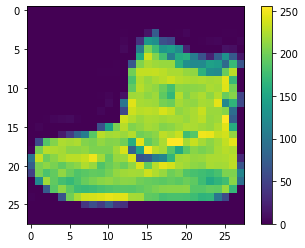

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Data Preprocessing
We will be scaling all of our grascale pixel value(0-255) to (0-1). Smaller values will make it easier for our model to process our values.

In [19]:
train_images = train_images/255.0
test_images = test_images/255.0

#Building the model
We will use keras sequential model with 3 different layers. The model represents a feed-forward neural network(passing value from left to right).

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

Layer 1: This layer will have 28x28 = 784 neurons (one pixel associated with each neuron)

Layer 2: First and only hidden layer. Dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is the output layer and is also a dense layer. It has 10 neurons that will determine our model output. The activation function softmax is used to calculate a probability distribution for each class. This means that the value of neuron will be between 0 and 1. 1 being the highest chance.

#Compile the model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track.

In [22]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Training the model
Now, it's finally time to train the model.

In [25]:
model.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2296 - accuracy: 0.9141
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2235 - accuracy: 0.9173
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9185
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - accuracy: 0.9207
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2035 - accuracy: 0.9232
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1989 - accuracy: 0.9252
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1941 - accuracy: 0.9269
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1853 - accuracy: 0.9303


#Evaluation the model
Verbose = 0 means silent and 1 means progress bar

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8877
Test Accuracy:  0.8877000212669373


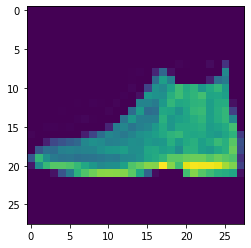

Ankle Boot


In [32]:
plt.figure()
plt.imshow(test_images[0])
plt.show()
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

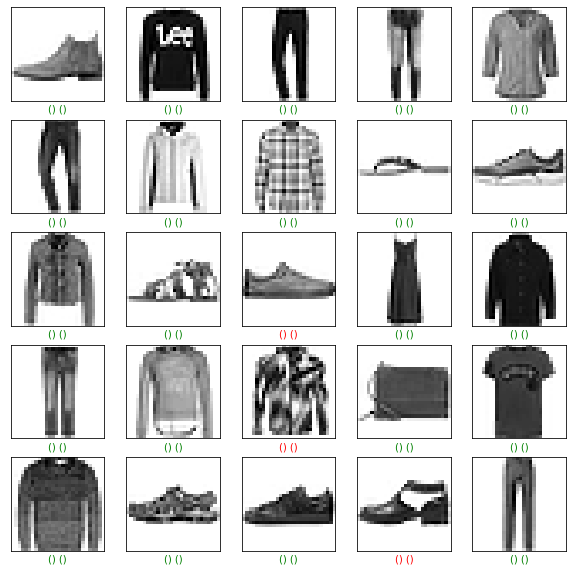

In [33]:
#Plot the first 25 test images, their predicted label, and the true label
#Color correct predictions in green, incorrect predictions in red
plt.figure (figsize = ( 10, 10))
for i in range (25):
  plt.subplot (5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label==true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel ( "() ()".format (class_names[predicted_label],
                               class_names[true_label] ),
                                color=color)